<a href="https://colab.research.google.com/github/varunreddy1268/4-1project/blob/main/4_2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [15]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [16]:
#exp_data used for data exploration
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
#Saving column names in a list using variable col
col=df.columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
#Drooping customer_id since no use of it.
df=df.drop(columns=['customerID'])

In [20]:
#Checking_If any null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df['TotalCharges'].value_counts()
df['TotalCharges'].replace(to_replace=" ",value=0,inplace=True)

In [22]:
#Conversion of object_data_type--->float_data_type
df['TotalCharges']=df['TotalCharges'].astype(str).astype(float)
exp_data=df

In [23]:
#replace method helps to replace values
df['Churn'].replace(to_replace="Yes",value=1,inplace=True)
df['Churn'].value_counts()

No    5174
1     1869
Name: Churn, dtype: int64

In [24]:
df['Churn'].replace(to_replace="No",value=0,inplace=True)

In [25]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
#instead of converting categorical variables to numerical using encoders make them have their own dummies.
df1=pd.get_dummies(df)
exp_dumm=df1

**CO_RELATION BETWEEEN FEATURES**

---
corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored


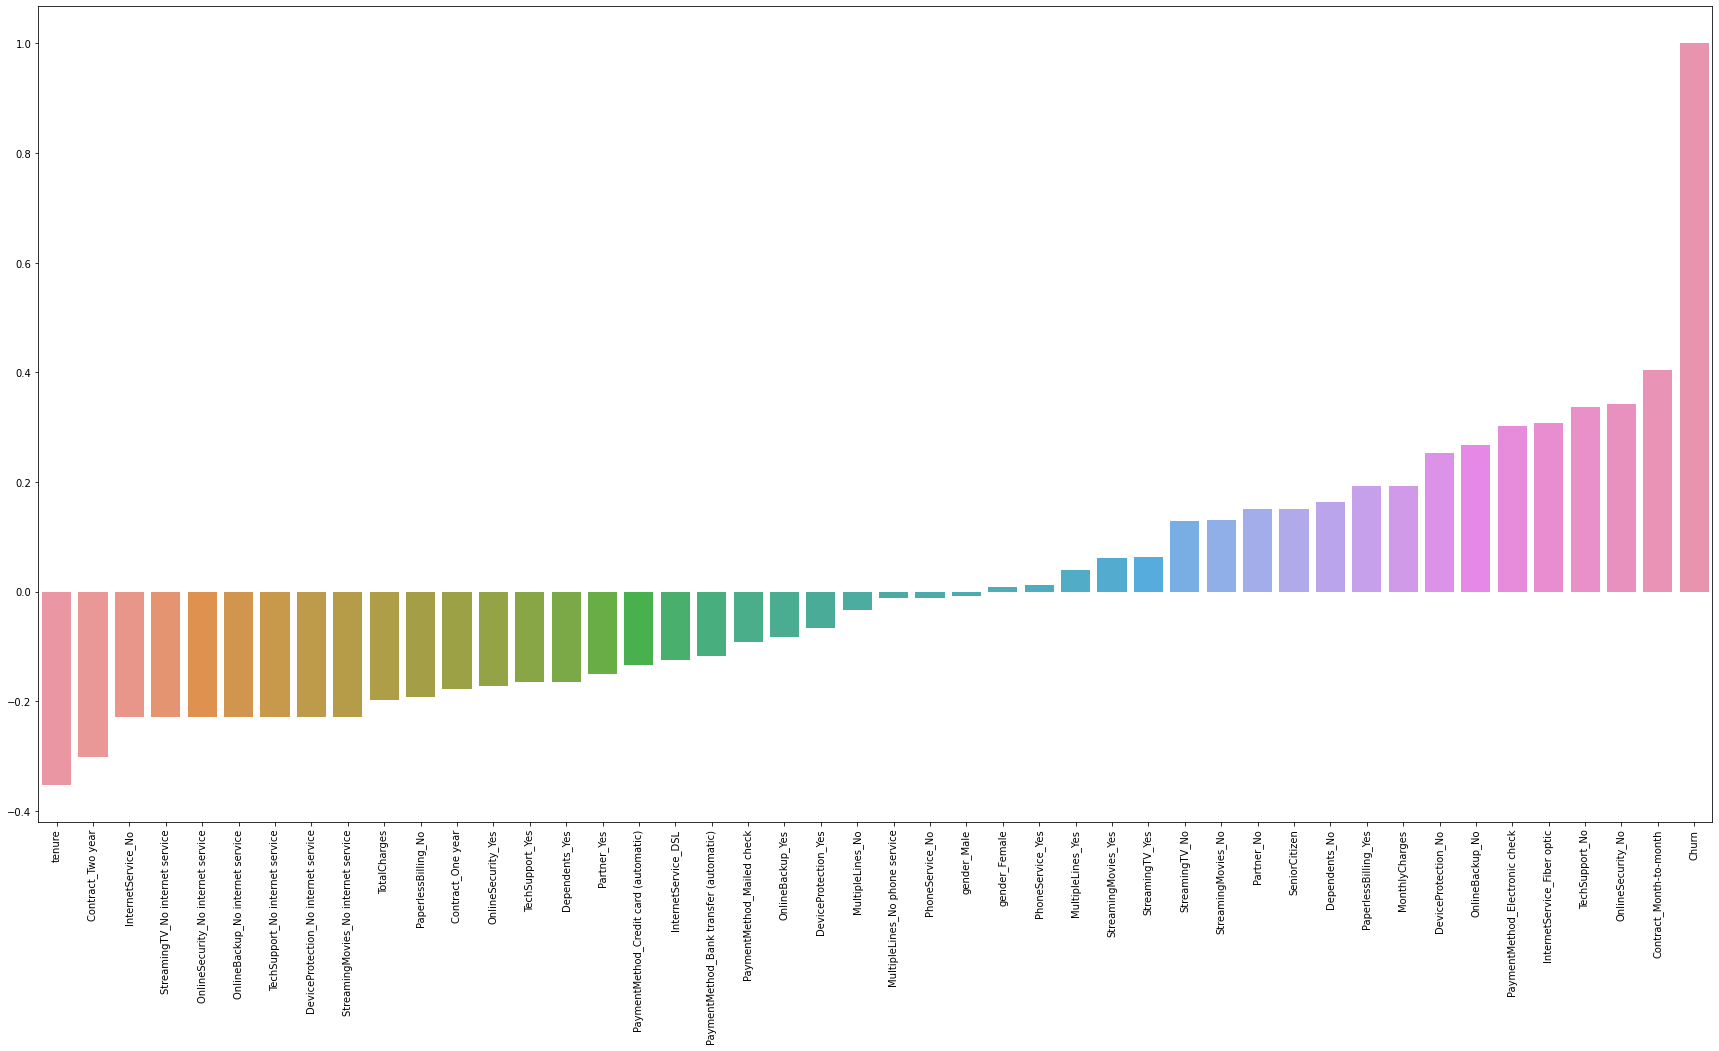

In [27]:
plt.figure(figsize=[30,15])
plt.xticks(rotation=90)
sns.barplot(x=df1.corr()['Churn'].sort_values().index,y=df1.corr()['Churn'].sort_values().values)

In [28]:
cols=df1.corr()['Churn'].sort_values()
#These columns are important columns for determinig the target values.
l=cols[(cols>0.25) | (cols<-0.25)].index.tolist()

**HEAT MAP**

---
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader.



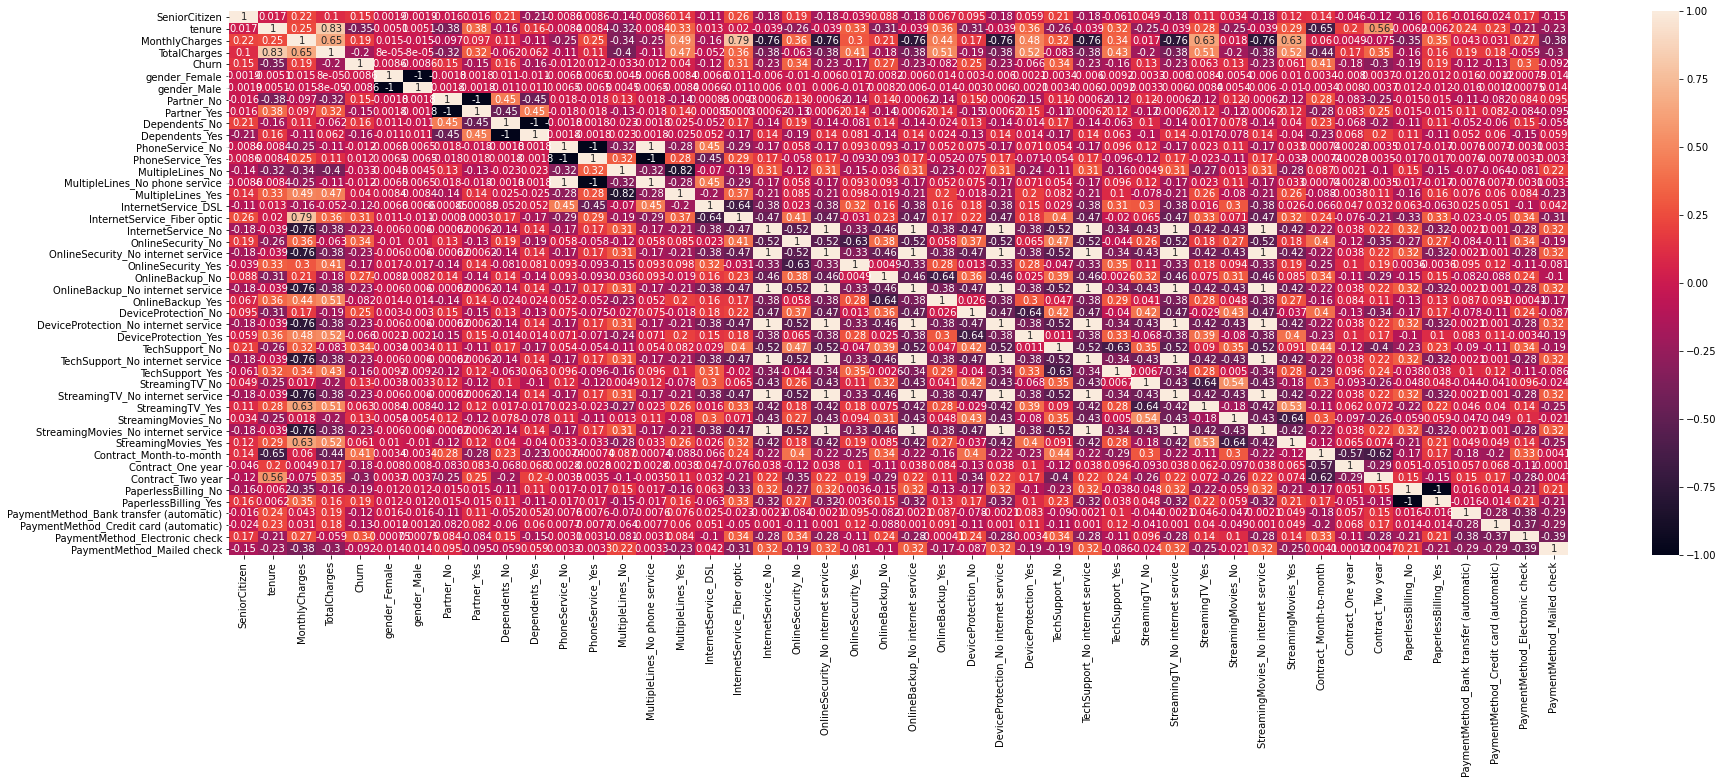

In [29]:
plt.figure(figsize=[30,10])
sns.heatmap(df1.corr(),annot=True)

#selecting Few important columns by analyzing from the graph we got to make a hihly potential co_relation matrix

In [103]:

c=df1[['tenure',
 'Contract_Two year',
 'DeviceProtection_No',
 'OnlineBackup_No',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'TechSupport_No',
 'OnlineSecurity_No',
 'Contract_Month-to-month',
 'Churn']]

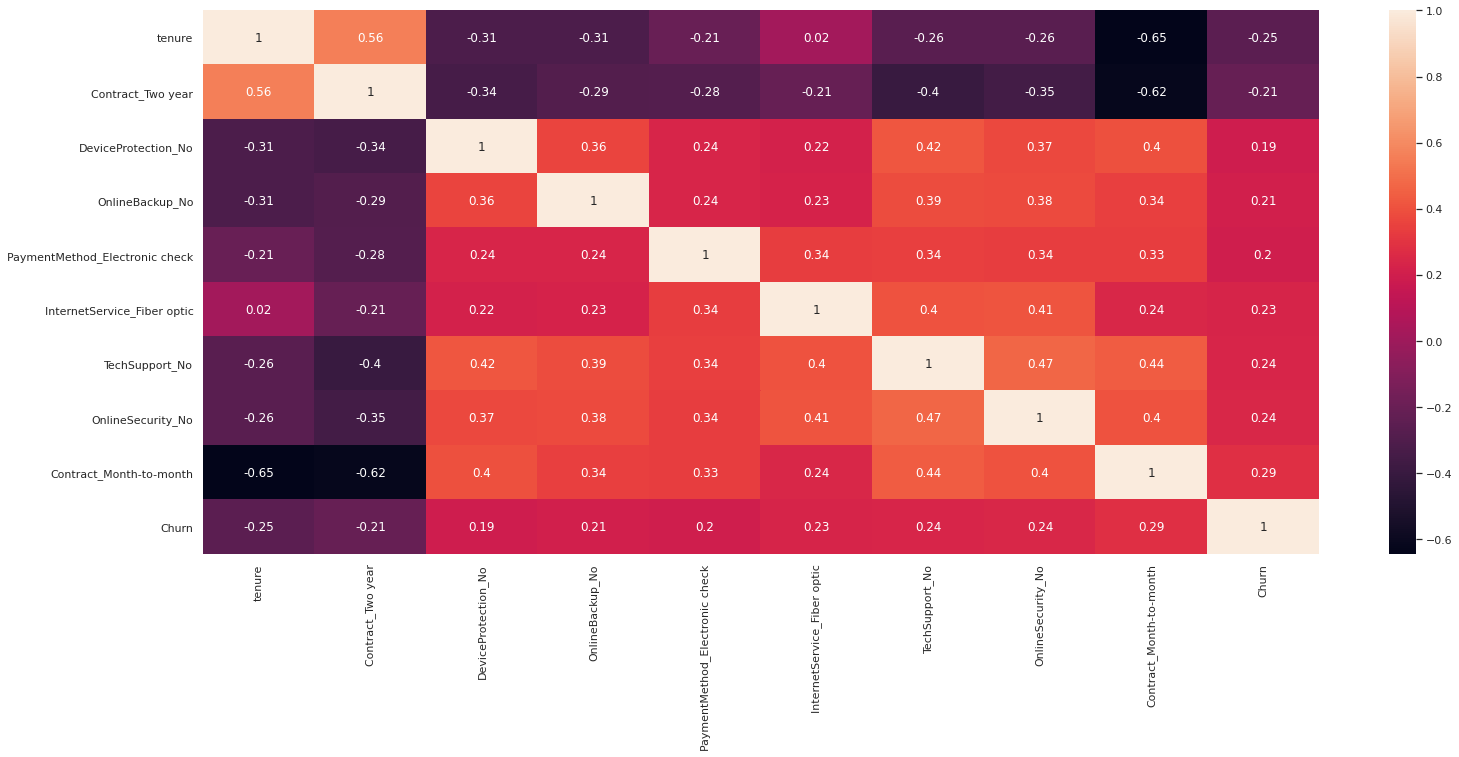

In [104]:
#few important columns coorealtion with target
sns.heatmap(c.corr(),annot=True)

**Data** **Exploration**

---
To understand better about the dataset we are working on letus plot some data plots to have better understanding about data in a simple way.


1. **Gender** vs **Churn**:-

---
We will explore how gender of a customer is defining the target variable.How the correlation between them is defined according to the data set.


[0, 0, 0, 0]


<Figure size 1080x576 with 0 Axes>

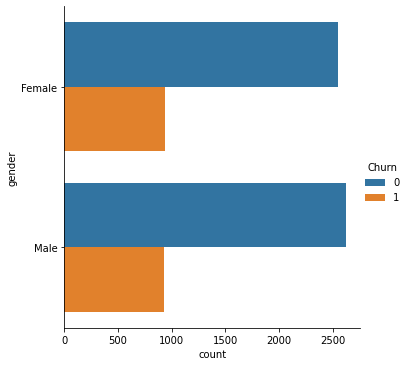

In [33]:
c1=exp_data[(exp_data['gender']=="Male") & (exp_data['Churn']=='Yes')]
c2=exp_data[(exp_data['gender']=="Male") & (exp_data['Churn']=='No')]
c3=exp_data[(exp_data['gender']=="Female") & (exp_data['Churn']=='Yes')]
c4=exp_data[(exp_data['gender']=="Female") & (exp_data['Churn']=='No')]
l=[len(c1),len(c2),len(c3),len(c4)]
plt.figure(figsize=(15,8))
sns.catplot(y="gender",hue="Churn",kind="count",data=exp_data)
print(l)

**Tenure vs Churn**

---


Tenure is one of the most coorelated Feature with Churn.

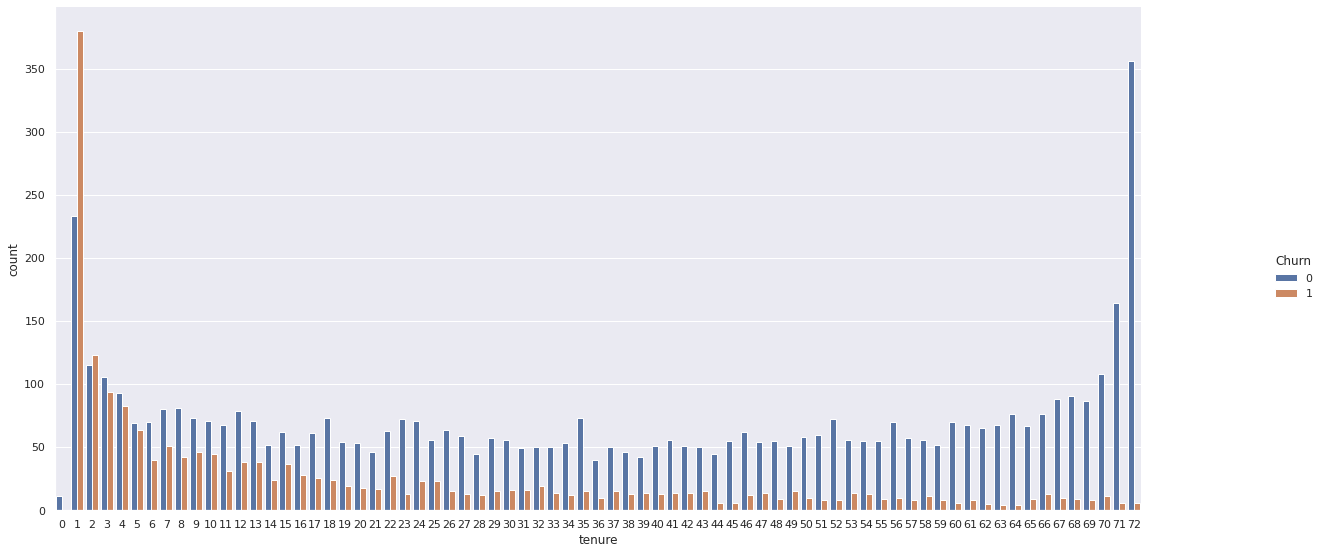

In [34]:
sns.set(rc={'figure.figsize':(25,10)})
ax=sns.catplot(x="tenure",hue="Churn",kind="count",data=exp_data,orient="h")
ax.fig.set_figwidth(20)
ax.fig.set_figheight(8)

**3 . Contract Based Churn Change**

---
By Seeing below graphs of (contract vs churn) we can note that heighest number of people left are from "month_to_month" contract based customer.



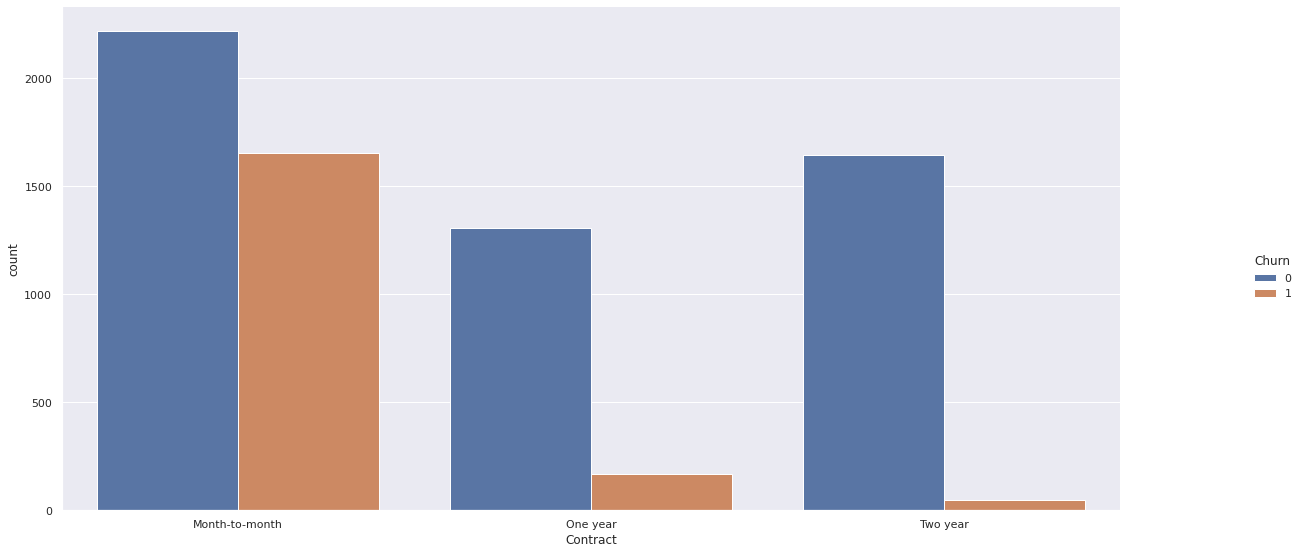

In [35]:
ax=sns.catplot(x="Contract",hue="Churn",kind="count",data=exp_data)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(8)

**(INTERNET_SERVICE VS CHURN)**

---
By Intrepretation of the below graphs we can notice that the customers having internetservice type as fiberoptic are facing problems and leaving the company.


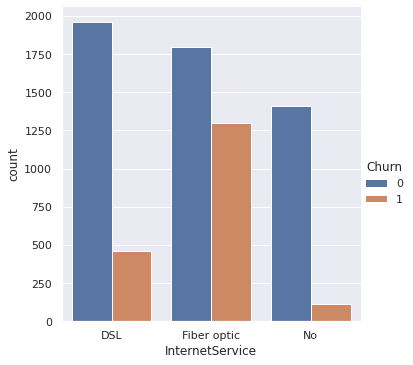

In [36]:
sns.catplot(x="InternetService",hue="Churn",kind="count",data=exp_data)

**(TECHSUPPORT VS CHURN)**

---

By below graph it potrays that customers who had no_proper technical support are leaving company in high numbers

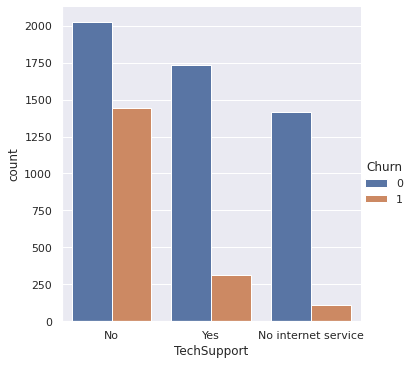

In [37]:
sns.catplot(x="TechSupport",hue="Churn",kind="count",data=exp_data)

**(ONLINE SECURITY VS CHURN)**

---
Same goes with online security if it is not present the customers are leaving which can be interpreted using below graph.


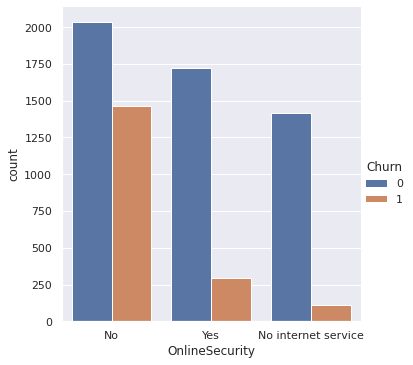

In [39]:
sns.catplot(x="OnlineSecurity",hue="Churn",kind="count",data=exp_data)

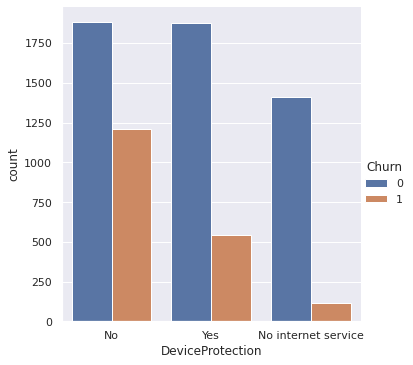

In [40]:
sns.catplot(x="DeviceProtection",hue="Churn",kind="count",data=exp_data)

In [41]:
#Lest keep a data_table to store accuracy scores of every model
acc=pd.DataFrame(columns=['Model_name','Accuracy_score'])

**Model Preperation**

---
Train_Test_Split()--->train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets

MinMaxScaler()--->MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.



In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
y=df1['Churn'].values
X=df1.drop(columns=['Churn'])
dp_fe=X.columns
m_scale=MinMaxScaler(feature_range=(0,1))
m_scale.fit(X)
X=pd.DataFrame(m_scale.transform(X))
X.columns=dp_fe


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

1.**logistic Regression**

->Logistic regression is a statistical method for predicting binary 
classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

->Logistic regression model can generate the predicted probability as any number ranging from negative to positive infinity, whereas probability of an outcome can only lie between 0< P(x)<1. However, to mitigate the problem of outliers a sigmoid function is used in logistic regression. The linear equation is put in the sigmoid function.


In [47]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))
acc1=pd.DataFrame({"Model_name":"Logistic Regression","Accuracy_score":0.801277501774308},index=[0])

0.801277501774308


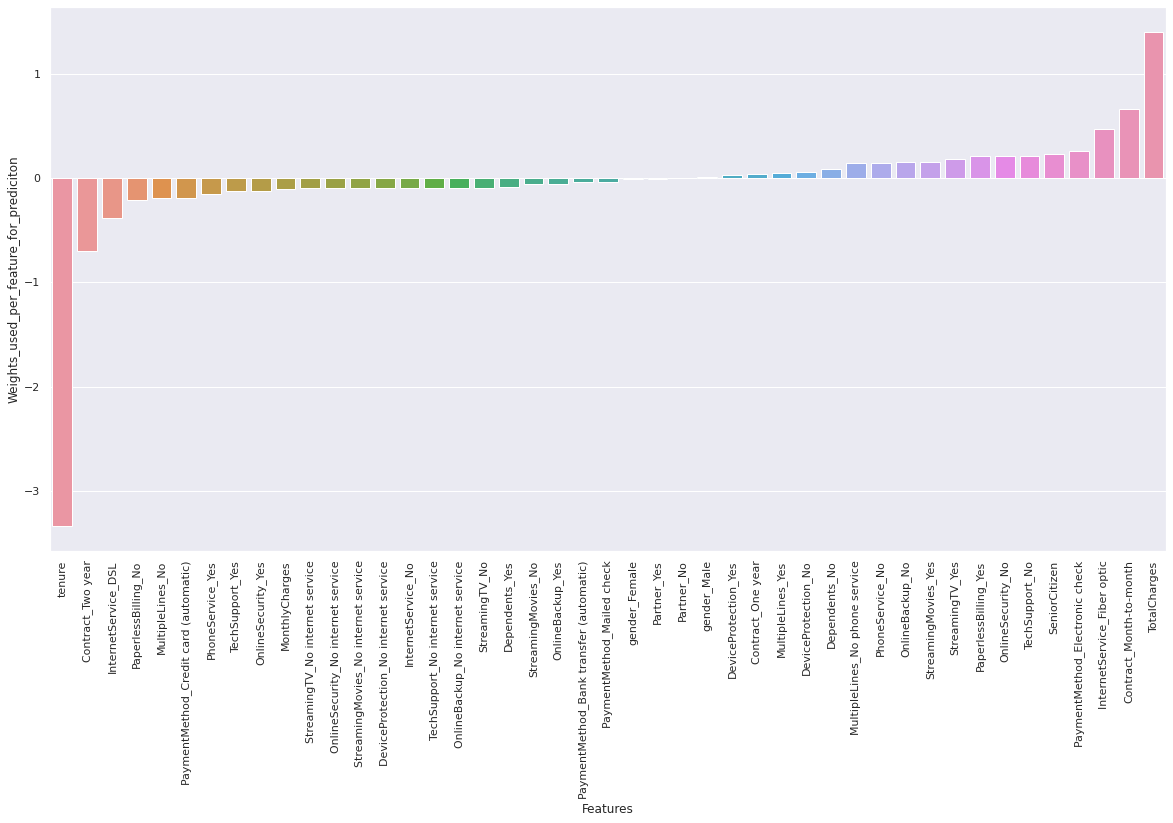

In [48]:
#Finding Weights used in the model for predictions are
w=lr_model.coef_[0].tolist()
coef=pd.DataFrame()
coef["Features"]=dp_fe
coef["Weights_used_per_feature_for_prediciton"]=w
coef=coef.sort_values(by="Weights_used_per_feature_for_prediciton")
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.barplot(x=coef["Features"],y=coef['Weights_used_per_feature_for_prediciton'])

2.**KNearestNeighbors**

---
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.



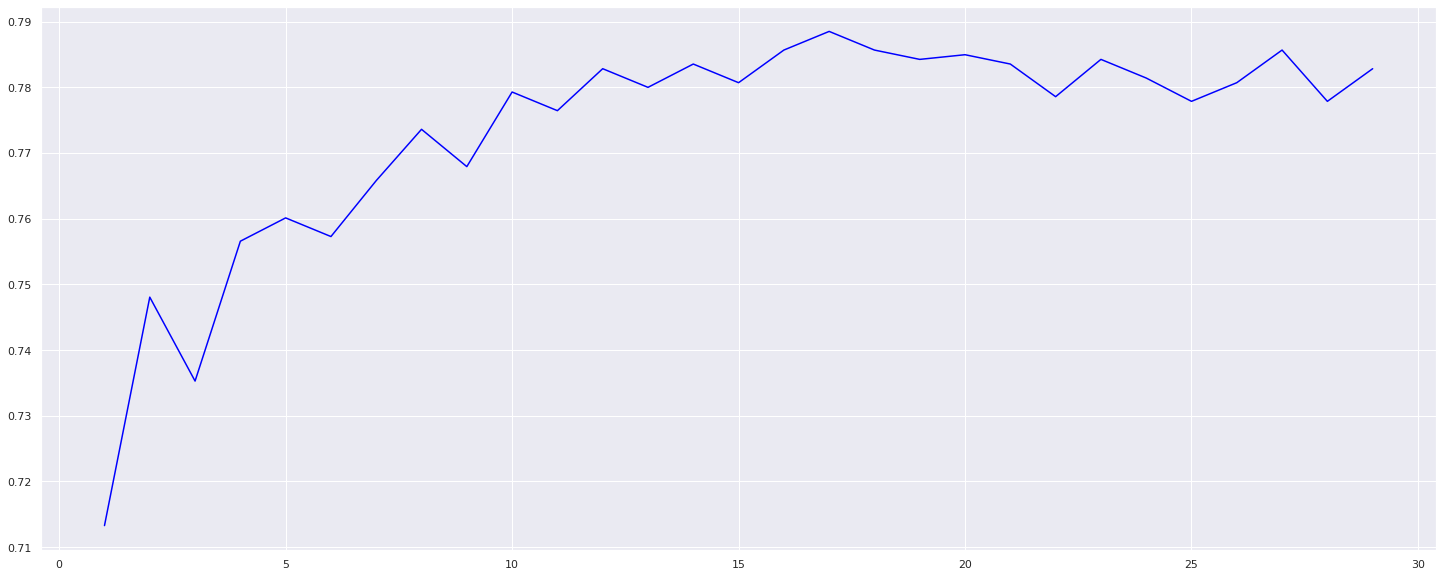

In [49]:
from sklearn.neighbors import KNeighborsClassifier
#let us see the inertia(Inertia is the sum of squared error for each cluster the smaller the inertia the denser the cluster)
res=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  #select n value as  since that is the point the graph took as a constaant flow.k=6
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  from sklearn import metrics
  acc_score=metrics.accuracy_score(y_pred,y_test)
  res.append(acc_score)
sns.lineplot(x=list(range(1,30)),y=res,color="blue")

In [50]:
#since the accuracy score is max at 13 so consider n value as n=13.
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc2=pd.DataFrame({"Model_name":"KNeighborsClassifier","Accuracy_score":0.7856635911994322},index=[1])

0.7856635911994322


3.**Random Forest Classifier**

---
random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier. ... Random forest adds additional randomness to the model, while growing the trees.


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfs_model=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto")
rfs_model.fit(X_train,y_train)
pred=rfs_model.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc3=pd.DataFrame({"Model_name":"RandomForestClassifier","Accuracy_score":0.7856635911994322},index=[2])

0.7856635911994322


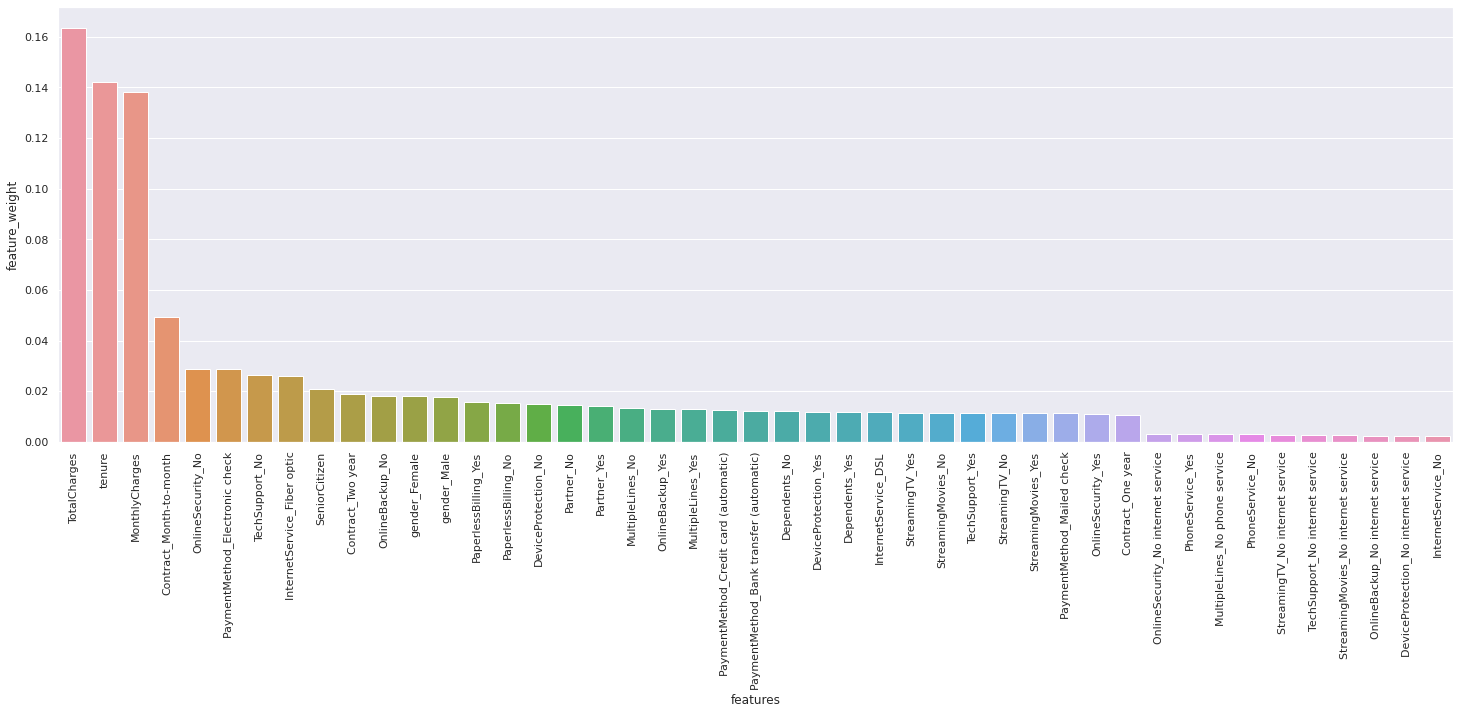

In [52]:
#Now checking the importance of each feature we used in random_forest_model
w_df=pd.DataFrame({"feature_weight":rfs_model.feature_importances_,"features":dp_fe}).sort_values(by="feature_weight",ascending=False)
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.barplot(x=w_df['features'],y=w_df['feature_weight'])

4.**Naive Bayes Classifier**

---
Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. To start with, let us consider a dataset.


In [53]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc4=pd.DataFrame({"Model_name":"GuassianNB","Accuracy_score":0.7061745919091554},index=[3])

0.7061745919091554


5.**Support Vector Machine**

---
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

The support vector machine (SVM) is a predictive analysis data-classification algorithm that assigns new data elements to one of labeled categories. SVM is, in most cases, a binary classifier; it assumes that the data in question contains two possible target values.



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [63]:
from sklearn.svm import SVC
model5=SVC(kernel="linear")
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_test,y_pred)
print(acc_score)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
acc5=pd.DataFrame({"Model_name":"SVC","Accuracy_score":0.7892122072391767},index=[4])

0.7892122072391767
[[915 108]
 [189 197]]


6.**AdaBoost Classifier**

---
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.



In [62]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
acc6=pd.DataFrame({"Model_name":"AdaBoostClassifier","Accuracy_score":0.8034066713981547},index=[5])

7.**XGB_CLASSIFIER**

---
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
acc7=pd.DataFrame({"Model_name":"XGBClassifier","Accuracy_score":0.7984386089425124},index=[6])

8.**ANN**

---
ANN stands for Artificial Neural Networks. Basically, it's a computational model. That is based on structures and functions of biological neural networks. Although, the structure of the ANN affected by a flow of information. Hence, neural network changes were based on input and output.


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [70]:
classifier=Sequential()
classifier.add(Dense(12, kernel_initializer= 'uniform', activation = 'relu', input_dim = 45))
classifier.add(Dense(6,kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 30)

Epoch 1/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8044
Epoch 2/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8000
Epoch 3/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8009
Epoch 4/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8035
Epoch 5/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8037
Epoch 6/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8028
Epoch 7/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8078
Epoch 8/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8062
Epoch 9/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8046
Epoch 10/30
564/564 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8076

In [100]:
y_pred = classifier.predict(X_test)
y_pred=y_pred.tolist()
for i in range(len(y_pred)):
  if y_pred[i][0]<0.5: y_pred[i]=0
  else: y_pred[i]=1
acc_score=metrics.accuracy_score(y_pred,y_test.tolist())
acc8=pd.DataFrame({"Model_name":"Artificial_Neural_Network","Accuracy_score":0.7970191625266146},index=[7])

In [105]:
df_list=[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]
res_df=pd.concat(df_list,ignore_index=True)

Accuracy score for every model when target is predicted and compared with original values

In [106]:
res_df

,Model_name,Accuracy_score
0,Logistic Regression,0.801278
1,KNeighborsClassifier,0.785664
2,RandomForestClassifier,0.785664
3,XGBClassifier,0.798439
4,SVC,0.789212
5,AdaBoostClassifier,0.803407
6,XGBClassifier,0.798439
7,Artificial_Neural_Network,0.797019
